### Required Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### The Data

In [2]:
df = pd.read_csv("D:\\Data\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

Let's start exploratory data analysis, we will start by checking missing values

#### Missing Values

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

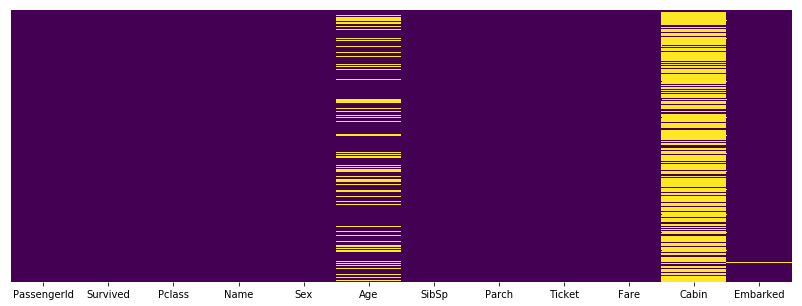

In [4]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

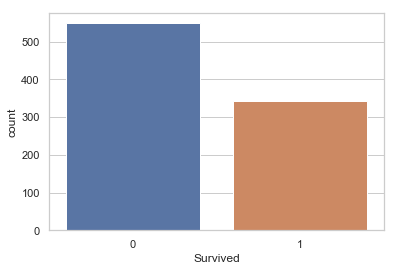

In [5]:
sns.set(style='whitegrid')
sns.countplot(x='Survived',data=df)

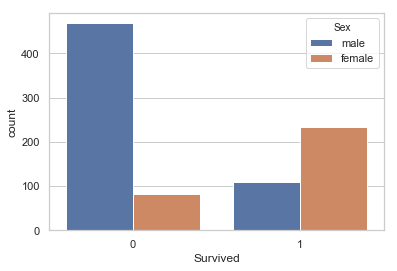

In [6]:
sns.set(style='whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

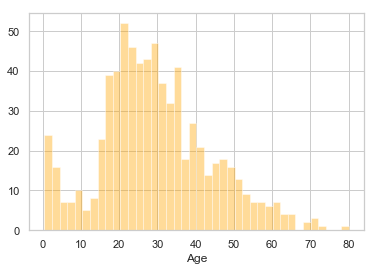

In [7]:
sns.distplot(df["Age"].dropna(),bins=40,kde=False,color='orange')

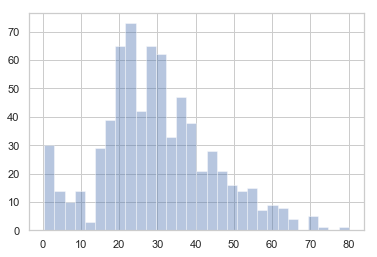

In [8]:
df.Age.hist(bins=30,alpha=0.4)

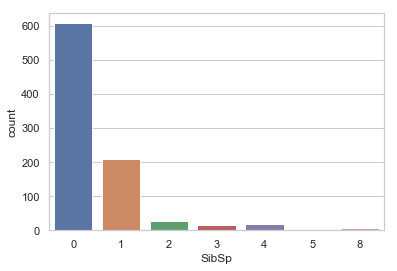

In [9]:
sns.countplot(x='SibSp',data=df)

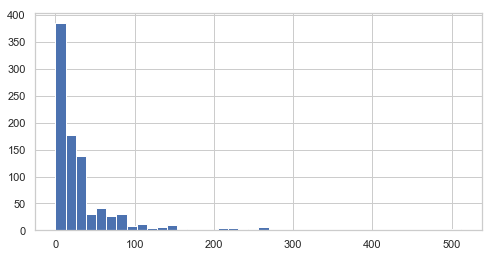

In [10]:
df['Fare'].hist(bins=40,figsize=(8,4))

### Data Cleaning

We want to fill in the missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers.However,we can be smarter about this and check the average age by passenger class. For Example:

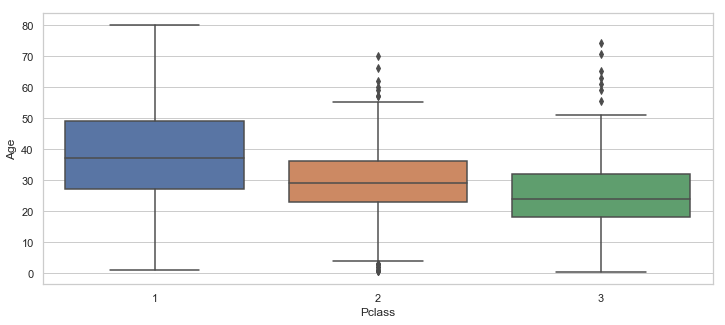

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Pclass",y="Age",data=df)

We can see the wealthier passengers in the higher class tends to be older, which make sense. We'll use these average age valuesto impute based on PClass for Age.

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age
            

Now apply this function

In [20]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check the heatmap again

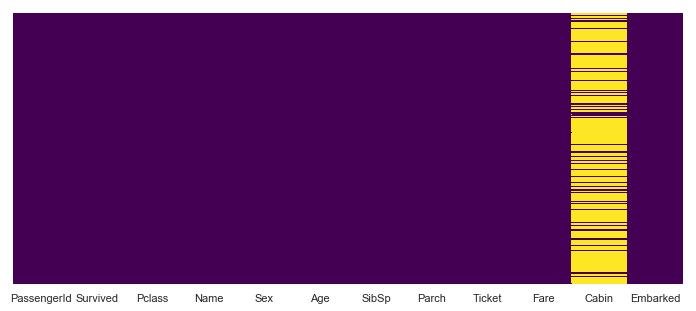

In [22]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [23]:
df.drop('Cabin',axis=1,inplace=True)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We will drop 'PassengerId','Name','Ticket' columns.

In [27]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

### Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise, our machine learning algorithm won't be able to take those features as inputs.

In [30]:
df_dummies = pd.get_dummies(df[['Sex','Embarked']],drop_first=True)

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [34]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [35]:
df1 = pd.concat([df,df_dummies],axis=1)

In [36]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Our data is now ready for our model

### Building a Logistic Regression Model

In [38]:
x = df1.iloc[:,df1.columns!='Survived']
y = df1.iloc[:,df1.columns=='Survived']

In [39]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [70]:
x.shape

(891, 8)

### Feature Scaling

In [78]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(x)

In [79]:
# Splitting the data in training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.30,random_state=101)

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# Training the model
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
# Performing predictions
y_pred = model.predict(X_test)

### AUC-ROC Curve

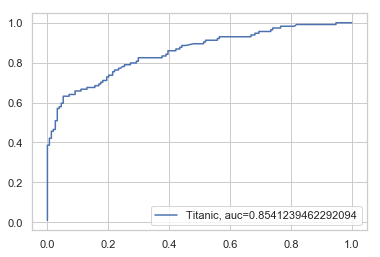

In [82]:
# Calculate the predicted probability on the test data 
y_pred_proba = model.predict_proba(X_test)[::,1]
# Creating the roc curve on y_test and y_pred_proba
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# Find area under roc curve 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# Using plt.plot ,plot auc score on the label
plt.plot(fpr,tpr,label="Titanic, auc="+str(auc))
#Print out label on the graph and loc value 
plt.legend(loc=4)
#Showing the plot
plt.show()

### Evaluation Score

In [83]:
from sklearn import metrics
# Create a list of parameter 
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score']
# Create a dataframe of the above list
models_report = pd.DataFrame(columns = cols)

# Create a result associated with the list mentioned above.
tmp1 = pd.Series({'Model': " Logistic Regression ",
                 'ROC Score' : metrics.roc_auc_score(y_test,y_pred),
                 'Precision Score': metrics.precision_score(y_test,y_pred),
                 'Recall Score': metrics.recall_score(y_test,y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test,y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test,y_pred)})

# Below code will append the above tmp2 series in model_report dataframe
model_lr = models_report.append(tmp1, ignore_index = True)
model_lr

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score
0,Logistic Regression,0.768398,0.791667,0.666667,0.783582,0.548034
